# Computer Vision project - Camilo Sierra

## Project objective

You are provided with a training set and a test set of images of 3 classes. Each image has a filename that is its
unique id. The dataset comprises 3 classes: COVID-19, Viral Pneumonia, and Normal. The goal of the project is
to create a classifier capable of determining the class of the X-ray image.

The project is inspired from a dataset from Kaggle.
Note: For project purposes, the dataset is modified according to the learning requirements.
You are provided with the following files:

testimage.npy
testLabels.csv
trainimage.npy
trainLabels.csv
 
The dataset (above 4 files) has to be downloaded from Olympus platform of Great Learning.

Context:
 Can you differentiate an X-ray image of a normal person from an unhealthy one?
 The ability to do so effectively can mean better diagnosis.
 
Objective:
To implement the techniques learnt as a part of the course.
Learning Outcomes:
 Pre-processing of image data.
 Visualization of images.
 Building CNN.
 Evaluate the Model.

In [1]:
# Lest import necessary libraries

import cv2
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the image file of dataset
images = np.load('/content/drive/My Drive/Colab Notebooks/trainimage.npy')

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/trainLabels.csv')

In [4]:
print(images.shape)
print(labels.shape)


(251, 128, 128, 3)
(251, 1)


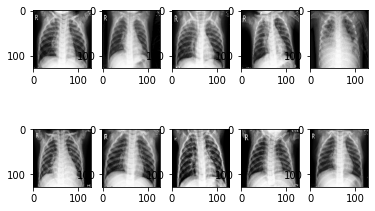

In [5]:
# Show some example images
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])

# Apply image processing on the images:

    Gaussian Blurring.
    Normalization.
    Visualize data after pre-processing.

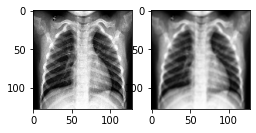

In [6]:
preprocessed_images = []       # Initialize empty list to store the images after pre-processing.

for img in images:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (3, 3), 0)   
     
    
    preprocessed_images.append(blurImg)        # Append image 
    
    # Show examples

plt.subplot(1, 3, 1); plt.imshow(img)         # Show the original image
plt.subplot(1, 3, 2); plt.imshow(blurImg)     # Blur image

preprocessed_images = np.asarray(preprocessed_images)    # Convert to numpy array.

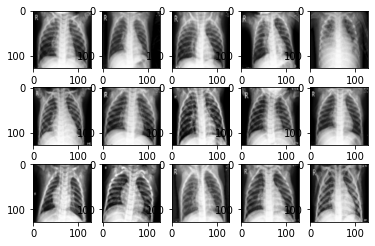

In [7]:
# Show sample result
for i in range(15):
    plt.subplot(3,5 , i + 1)
    plt.imshow(preprocessed_images[i])

In [8]:
# Normalize image data.
preprocessed_images = preprocessed_images / 255

Make data compatible:

Convert labels from digits to one hot vectors.
Print the label for y_train[0].
Check the shape of data, Reshape data into shapes compatible with Keras models, if already not compatible.

In [9]:
# Convert labels from digits to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(labels)

In [10]:
#visualize  labels as vectors
y[1]

array([0, 0, 1])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preprocessed_images, y, test_size=0.3, random_state=42)

In [12]:
##visualize shape of split 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(175, 128, 128, 3)
(175, 3)
(76, 128, 128, 3)
(76, 3)


## Reshape data into shapes compatible with Keras models.

In [13]:
X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(175, 128, 128, 3)
(175, 3)
(76, 128, 128, 3)
(76, 3)


## Split data into Test and Validation

In [15]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state=random_seed)

In [16]:
print(X_test.shape)
print(X_val.shape)

(38, 128, 128, 3)
(38, 128, 128, 3)


Building CNN Model:

In [17]:
# Set the CNN model

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [18]:
# Set the optimizer and loss function, and compile the model with them.

optimizer = Adam(
                  learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-07,
                  amsgrad=False,
                  name='Adam')
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
#  epochs = 50, and fit the model. 
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_val,Y_val),batch_size = batch_size)

Epoch 1/50
6/6 [==============================] - 13s 2s/step - loss: 4.9555 - accuracy: 0.3807 - val_loss: 1.0988 - val_accuracy: 0.3684
Epoch 2/50
6/6 [==============================] - 11s 2s/step - loss: 3.4166 - accuracy: 0.3999 - val_loss: 1.0965 - val_accuracy: 0.3684
Epoch 3/50
6/6 [==============================] - 11s 2s/step - loss: 2.7655 - accuracy: 0.4798 - val_loss: 1.1023 - val_accuracy: 0.3684
Epoch 4/50
6/6 [==============================] - 11s 2s/step - loss: 1.7785 - accuracy: 0.5330 - val_loss: 1.1101 - val_accuracy: 0.3684
Epoch 5/50
6/6 [==============================] - 11s 2s/step - loss: 1.6819 - accuracy: 0.5537 - val_loss: 1.1442 - val_accuracy: 0.3684
Epoch 6/50
6/6 [==============================] - 11s 2s/step - loss: 1.3904 - accuracy: 0.6233 - val_loss: 1.1887 - val_accuracy: 0.3684
Epoch 7/50
6/6 [==============================] - 11s 2s/step - loss: 1.5559 - accuracy: 0.5815 - val_loss: 1.2587 - val_accuracy: 0.3684
Epoch 8/50
6/6 [==================

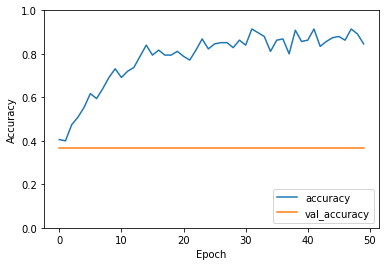

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right');

Conclusion:
A CNN model was built to classify images in tree clases, Covid-19, Viral Pneumonia and Normal. The performance of the model is satisfatory, accuracy of 0.84 was achived.  